In [1]:
import sympy
import numpy as np
import seaborn as sns
import collections
import math

In [2]:
import matplotlib.pyplot as plt 
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import glob
import pathlib
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

2022-03-31 11:58:32.343536: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-31 11:58:32.343574: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
from PIL import Image

#path to the image.
def callImage(path):
    x1 = Image.open(
        path).convert('L');
    y1 = np.asarray(x1.getdata(), dtype=np.float64).reshape((x1.size[1], x1.size[0]));
    y_dat1 = np.asarray(y1, dtype=np.uint8)     
    return y_dat1

#Resize image into n x n pixel ( pixel is an int)
def imageResize(data,pixel):
    image = Image.fromarray(data,'L')
    image= image.resize((pixel, pixel))
    image=np.asarray(image.getdata(), dtype=np.float64).reshape((image.size[1], image.size[0]))
    image=np.asarray(image, dtype=np.uint8)    
    return image

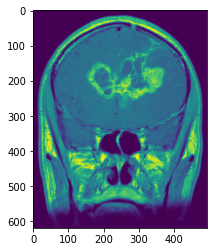

In [4]:
data_img = callImage("image.jpg")
plt.imshow(data_img)

In [5]:
image = imageResize(data_img,3) # Can be printed with plt.imshow(image)
image.flatten()

array([ 57, 107,  60, 100, 104, 100,  86,  84,  71], dtype=uint8)

In [6]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit import  Aer, execute
from qiskit.quantum_info import state_fidelity
from qiskit.visualization import *
from qiskit.quantum_info.operators import Operator

nqubits=9

In [7]:
def phaseFlip(testdata):
    arr_data=testdata.flatten()/max(testdata.flatten());
    encoding_data= np.array([np.round(x,8) for x in arr_data]);
    sum_const=np.sqrt(sum(np.absolute(encoding_data) ** 2))
    encoding_norm=encoding_data/sum_const
    m=np.diag(np.exp(complex(0,1)*np.pi*encoding_norm))
    return m

In [8]:
def convert_to_circuit(image):
    qr = QuantumRegister(nqubits)
    cr = ClassicalRegister(nqubits)
    m = phaseFlip(np.array(image))
    #Initilzation
    qc = QuantumCircuit(qr, name='UI')
    #qc.initialize(desired_vector, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
    qc.unitary(m, range(nqubits), label='UI')
    
    return qc

    
    

In [9]:
qc= convert_to_circuit(image)
print(qc)


ExtensionError: 'Input matrix is not an N-qubit operator.'

In [10]:
# GREY_THRESHOLD = 0.33
# WHITE_THRESHOLD = 0.66

# x_train_bin = np.array([ (math.pi / 2) if x_train > WHITE_THRESHOLD else 0 if x_train<GREY_THRESHOLD else (math.pi / 4) ], dtype=np.float32)
# x_test_bin = np.array([0 if x_train > WHITE_THRESHOLD else (math.pi / 2) if x_train<GREY_THRESHOLD else (math.pi / 4) ], dtype=np.float32)

NameError: name 'x_train' is not defined

In [11]:
# def convert_to_circuit(image):
#     """Encode truncated classical image into quantum datapoint."""
#     values = np.ndarray.flatten(image)
#     circuit = Circuit().h(range(9))
#     for i, value in enumerate(values):
#         circuit.ry(i, value)
#         circuit.X(i)
#     return circuit